MSE pada Data Latih sebelum Pruning: 0.0000


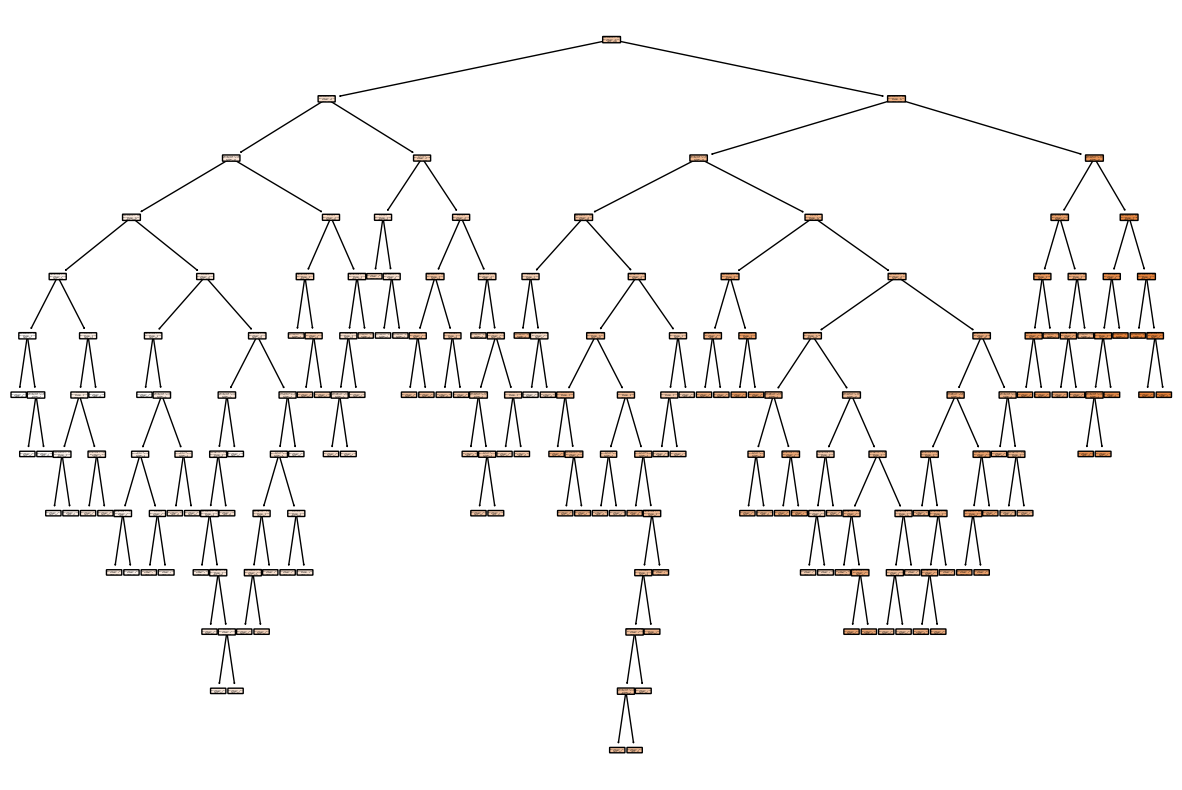

MSE pada Data Latih setelah Pruning: 0.0945


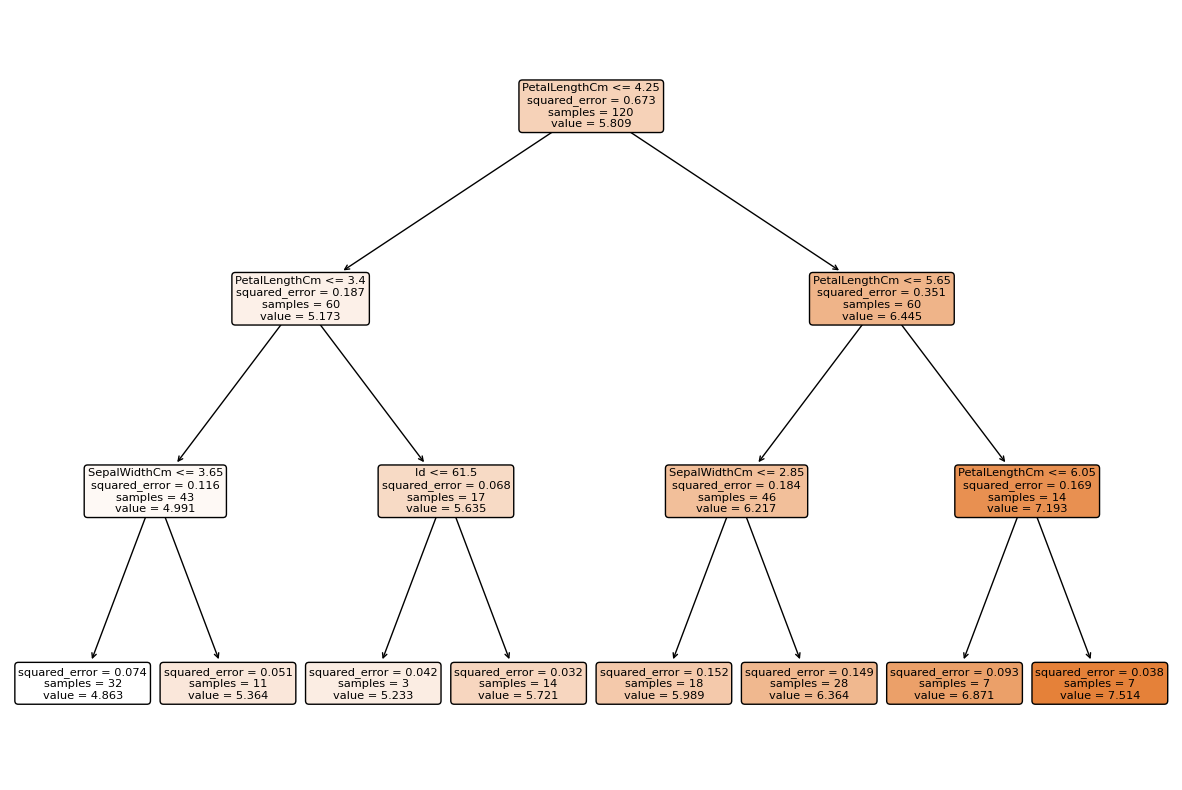

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Membaca dataset Iris dari file CSV
iris_data = pd.read_csv('iris.csv')

# Memilih satu fitur sebagai variabel target (contoh: SepalLengthCm)
X = iris_data.drop(['Species', 'SepalLengthCm'], axis=1)
y = iris_data['SepalLengthCm']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi Decision Tree Regressor
regression_tree = DecisionTreeRegressor(max_depth=None, random_state=42)

# Melatih model pada data latih
regression_tree.fit(X_train, y_train)

# Mencetak MSE pada data uji sebelum pruning
y_pred_train = regression_tree.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE pada Data Latih sebelum Pruning: {mse_train:.4f}')

# Visualisasi Decision Tree sebelum pruning
plt.figure(figsize=(15, 10))
plot_tree(regression_tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Pruning dengan menyetel parameter max_depth
regression_tree_pruned = DecisionTreeRegressor(max_depth=3, random_state=42)
regression_tree_pruned.fit(X_train, y_train)

# Mencetak MSE pada data uji setelah pruning
y_pred_train_pruned = regression_tree_pruned.predict(X_train)
mse_train_pruned = mean_squared_error(y_train, y_pred_train_pruned)
print(f'MSE pada Data Latih setelah Pruning: {mse_train_pruned:.4f}')

# Visualisasi Decision Tree setelah pruning
plt.figure(figsize=(15, 10))
plot_tree(regression_tree_pruned, feature_names=X.columns, filled=True, rounded=True)
plt.show()